In [30]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

pd.set_option('display.mpl_style', 'default') # Make the graphs a bit prettier
plt.rcParams['figure.figsize'] = (10, 7)

In [31]:
data = np.load('/home/jvdzwaan/data/dilipad/results/20112012/adj-parties/perspective_jsd_100.npy')

/usr/lib/pymodules/python2.7/matplotlib/font_manager.py:1236: UserWarning: findfont: Font family ['monospace'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/lib/pymodules/python2.7/matplotlib/font_manager.py:1246: UserWarning: findfont: Could not match :family=Bitstream Vera Sans:style=normal:variant=normal:weight=normal:stretch=normal:size=medium. Returning /usr/share/matplotlib/mpl-data/fonts/ttf/cmb10.ttf
  UserWarning)
/usr/lib/pymodules/python2.7/matplotlib/font_manager.py:1246: UserWarning: findfont: Could not match :family=Bitstream Vera Sans:style=normal:variant=normal:weight=normal:stretch=normal:size=large. Returning /usr/share/matplotlib/mpl-data/fonts/ttf/cmb10.ttf
  UserWarning)


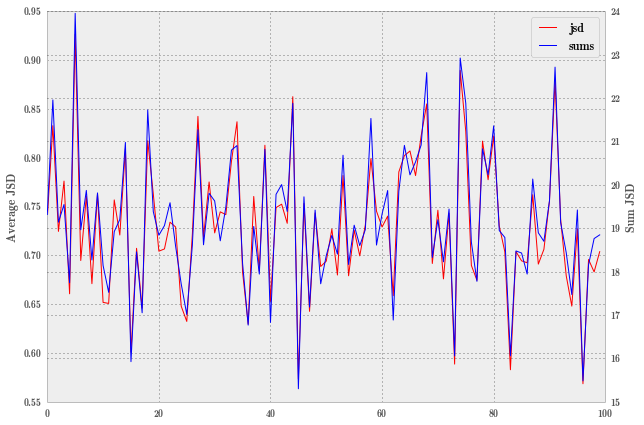

In [32]:
jsd_sums = data.sum(axis=(2, 1))

jsd = pd.read_csv('/home/jvdzwaan/data/dilipad/results/20112012/adj-parties/jsd_100.csv', index_col=0)
jsd['sums'] = jsd_sums

fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

jsd.jsd.plot(kind='line', color='red')
jsd.sums.plot(kind='line', color='blue', ax=ax2)

ax.set_ylabel('Average JSD')
ax2.set_ylabel('Sum JSD')

# ask matplotlib for the plotted objects and their labels
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

plt.show()

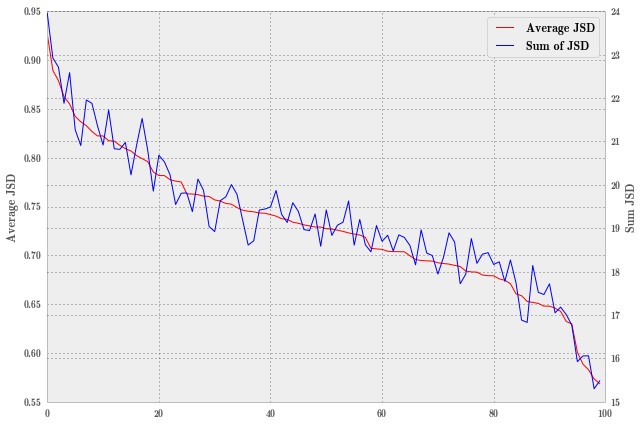

In [33]:
# sorted by avarage jsd
jsd2 = jsd.sort(['jsd'], ascending=False)
jsd2 = jsd2.reset_index(drop=True)
#print jsd2

fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

jsd2.jsd.plot(kind='line', color='red')
jsd2.sums.plot(kind='line', color='blue', ax=ax2)

ax.set_ylabel('Average JSD')
ax2.set_ylabel('Sum JSD')

# ask matplotlib for the plotted objects and their labels
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, ['Average JSD', 'Sum of JSD'], loc=0)

plt.show()

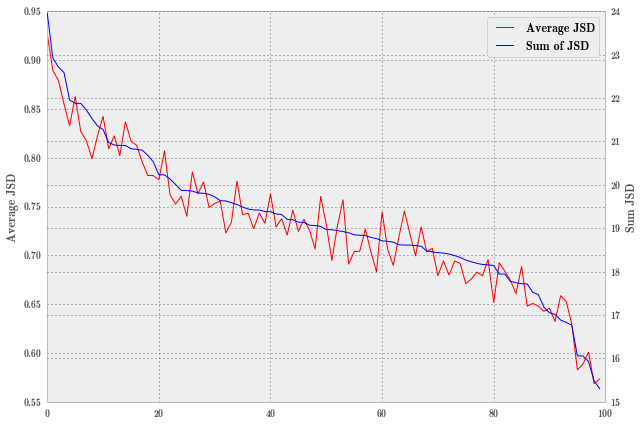

In [34]:
# sorted by sum jsd
jsd2 = jsd.sort(['sums'], ascending=False)
jsd2 = jsd2.reset_index(drop=True)
#print jsd2

fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

jsd2.jsd.plot(kind='line', color='red')
jsd2.sums.plot(kind='line', color='blue', ax=ax2)

ax.set_ylabel('Average JSD')
ax2.set_ylabel('Sum JSD')

# ask matplotlib for the plotted objects and their labels
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, ['Average JSD', 'Sum of JSD'], loc=0)

plt.show()

In [35]:
import glob
import re
# gegeven topic nummer, print topic

# laad topics
topics = pd.read_csv('/home/jvdzwaan/data/dilipad/results/20112012/adj-parties/topics_100.csv', index_col=0, encoding='utf-8')

# laad opinions
opinions = {}
opinion_files = glob.glob('/home/jvdzwaan/data/dilipad/results/20112012/adj-parties/opinions_*_100.csv')
for f in opinion_files:
    m = re.match(r'.+opinions_(.+)_100.csv', f)
    name = m.group(1)
    opinions[name] = pd.read_csv(f, index_col=0, encoding='utf-8')

In [36]:
from cptm.utils.topics import get_top_topic_words, topic_str

df = get_top_topic_words(topics, opinions, 5)
print topic_str(df, single_line=True, weights=True)

KeyError: u'no item named weigths_topic'

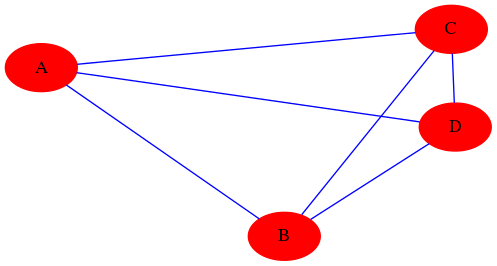

In [37]:
import networkx as nx
import numpy as np
import string

dt = [('len', float)]
A = np.array([(0, 0.3, 0.4, 0.7),
               (0.3, 0, 0.9, 0.2),
               (0.4, 0.9, 0, 0.1),
               (0.7, 0.2, 0.1, 0)
               ])*10
A = A.view(dt)

G = nx.from_numpy_matrix(A)
G = nx.relabel_nodes(G, dict(zip(range(len(G.nodes())),string.ascii_uppercase)))    

G = nx.to_agraph(G)

G.node_attr.update(color="red", style="filled")
G.edge_attr.update(color="blue", width="2.0")

G.draw('/tmp/out.png', format='png', prog='neato')

from IPython.display import Image
Image(filename='/tmp/out.png') 

topic:	euro unie crisis lidstaat markt bevoegdheid munt bevolking soevereiniteit visie
PvdD:	democratisch monetair gezamenlijk grieks vergaand gemeenschappelijk onmogelijk zuidelijk rijk waar
D66:	institutioneel buitenlands duits zwak democratisch afdwingbaar fundamenteel intern moeizaam krachtig
CDA:	gemeenschappelijk essentieel financieel-economisch intern ongekend onderling zuidelijk speciaal monetair zwak
PvdA:	duurzaam buitenlands publiek vroeg duits voortdurend nader goedkoop kennelijk recent
GroenLinks:	democratisch buitenlands stevig eenzijdig duurzaam centraal geloofwaardig structureel permanent automatisch
SGP:	essentieel historisch stevig omstreden gebruikelijk eenvoudig prachtig afhankelijk doorslaggevend interessant
SP:	democratisch monetair rijk diep fundamenteel duits inclusief ondemocratisch vreemd heilig
PVV:	inclusief zwart publiek permanent zuidelijk zuid-europees informeel onmiddellijk buitenlands wakke
50PLUS:	commercieel grotendeels nauwgezet traceerbaar duur mini

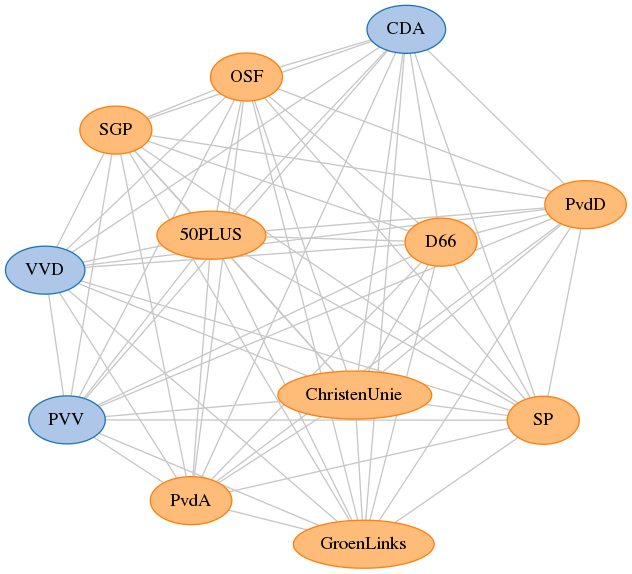

In [38]:
import networkx as nx
import numpy as np
import string

topic = 5

ar = data[topic]

for i in range(ar.shape[0]):
    for j in range(ar.shape[1]):
        if ar[i,j] == 0 and not i == j:
            ar[i,j] = ar[j,i]

perspectives = [u'50PLUS', u'CDA', u'ChristenUnie', u'D66', u'GroenLinks', u'OSF', u'PVV', u'PvdA',
                u'PvdD', u'SGP', u'SP', u'VVD']
government = ['VVD', 'CDA', 'PVV']

dt = [('len', float)]
A = ar*10
A = A.view(dt)

G = nx.from_numpy_matrix(A)
G = nx.relabel_nodes(G, dict(zip(range(len(G.nodes())), perspectives)))

for perp in perspectives:
    G.node[perp]['style'] = 'filled'
    if perp in government:
        G.node[perp]['color'] = '#1f77b4'
        G.node[perp]['fillcolor'] = '#aec7e8'
    else:
        G.node[perp]['color'] = '#ff7f0e'
        G.node[perp]['fillcolor'] = '#ffbb78'        

G = nx.to_agraph(G)
G.graph_attr['outputorder'] = 'edgesfirst'

G.edge_attr.update(color="#c7c7c7", width="1.0")
#G.node_attr.update(color="red", style="filled")

G.draw('/tmp/out.png', format='png', prog='neato')

df = get_top_topic_words(topics, opinions, topic)
print topic_str(df, single_line=True, weights=False)

from IPython.display import Image
Image(filename='/tmp/out.png') 

# http://stackoverflow.com/questions/13814640/color-a-particular-node-in-networkx-and-graphviz

In [ ]:
jsd2 = jsd.sort(['sums'], ascending=False)


In [ ]:
perspectives = [u'50PLUS', u'CDA', u'ChristenUnie', u'D66', u'GroenLinks', u'OSF', u'PVV', u'PvdA',
                u'PvdD', u'SGP', u'SP', u'VVD']